# Tp3_partie1

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

#  Charger de données

In [2]:
data=loadmat('TP3 K-means data1.mat')
X = data["X"]

#  Sélectionner un ensemble initial de centroïdes

In [3]:
K = 3 # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Créer une fonction pour trouver les centroïdes les plus proches

In [5]:
def findClosestCentroids(X, centroids):

    K = centroids.shape[0]
    idx = np.zeros((X.shape[0], 1), dtype=np.int8)
   
    for i in range(X.shape[0]):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
     

        min_dst = np.argmin(distances)
        idx[i] = min_dst
    
    return idx

# Trouver les centroïdes les plus proches pour les exemples.

idx = findClosestCentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples: \n')
print(idx[:3])
print('\n(The closest centroids should be 0, 2, 1 respectively)')

Closest centroids for the first 3 examples: 

[[0]
 [0]
 [0]]

(The closest centroids should be 0, 2, 1 respectively)


# Computing centroid means

In [6]:
   def computeCentroids(X, idx, K):
    m, n = X.shape
    
    centroids = np.zeros((K, n))
    
    for k in range(K):
        centroids[k, :] = np.mean(X[idx.ravel() == k, :], axis=0)
    
    return centroids
centroids = computeCentroids(X, idx, K)

print('Centroids computed after initial finding of closest centroids: \n')
print(centroids)
print('\nThe centroids should be:\n')
print('[ 2.42830111  3.15792418 ]')
print('[ 5.81350331  2.63365645 ]')
print('[ 7.11938687  3.6166844 ]')

Centroids computed after initial finding of closest centroids: 

[[3.48343653 4.67666952]
 [5.24408518 4.66148767]
 [5.44433562 6.03683605]]

The centroids should be:

[ 2.42830111  3.15792418 ]
[ 5.81350331  2.63365645 ]
[ 7.11938687  3.6166844 ]


# K-means

K-Means iteration 0/10...
K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...

K-Means Done.


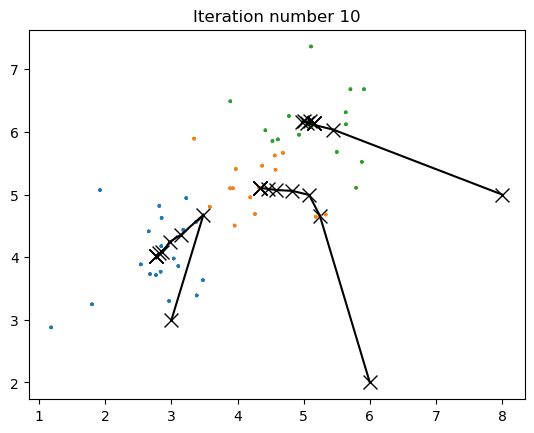

In [8]:
def plotDataPoints(X, idx, K):
    colors = [plt.cm.tab20(float(i) / 10) for i in idx]

    plt.scatter(X[:,0], X[:,1], c=colors, alpha=0.5, s=2)

def plotProgresskMeans(X, centroids, previous, idx, K, i):

    plotDataPoints(X, idx, K)

    plt.scatter(centroids[:,0], centroids[:,1],
                marker='x', c='k', s=100, linewidth=1)

    for j in range(centroids.shape[0]):
        plt.plot([centroids[j, :][0], previous[j, :][0]],
                 [centroids[j, :][1], previous[j, :][1]], c='k')
    plt.title('Iteration number {:d}'.format(i+1))

def runkMeans(X, initial_centroids, max_iters, plot_progress):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m, 1))
    plt.ion()
    for i in range(max_iters):
        print('K-Means iteration {}/{}...'.format(i, max_iters))
        
        idx = findClosestCentroids(X, centroids)
        
        if plot_progress:
            plotProgresskMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        centroids = computeCentroids(X, idx, K)

    return centroids, idx

K = 3
max_iters = 10
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

centroids, idx = runkMeans(X, initial_centroids, max_iters, plot_progress=True)
print('\nK-Means Done.')